# Практическая работа 1

## Тема: геометрические преобразования и монокулярное зрение

### Задачи: 
* знакомство с python, numpy, jupyter, matplotlib и проч.
* применение пройденных геометрических преобразований
* применение законов центральной проекции
* применение обратного проецирования с априорными знаниями
* ???

### Prerequirements 
* интерпретатор python 2.7.xx
* библиотеки numpy, matplotlib, scipy

Это - интерактивная веб-оболочка для последовательного выполнения команд на языке Python.
Она состоит из клеток(Cell), которые могут содержать как программный код, так и текст в синтаксисе разметки Markdown.

Попробуйте для проверки изменить содержимое данного Cell. 

Далее следует Cell с исходным кодом.
Запустите ее чтобы получить результат

In [115]:
# тут можно вставлять комментарии
print 'hello, world!. ', str(5 + 7)

def generate_random_number():
    return 4

hello, world!.  12


In [116]:
# разные клеточки делят все имена функций, классов, переменные и их значения.
# а так же импортнутые модули и проч.
print 'rolling... '
print generate_random_number()

rolling... 
4


Итак, давайте
### Приступим к заданию

для начала проверим, что установлены все библиотеки.
у меня следующий код выводит что-то вроде


numpy found, version is  1.11.0

matplotlib found, version is  1.5.3

scipy found, version is  0.17.0

In [17]:
#coding=utf-8
import numpy as np
print 'numpy found, version is ', np.__version__

import matplotlib as mpl
import matplotlib.pyplot as plt # pyplot - обертка matplotlib для интерактивного графопостроения.
print 'matplotlib found, version is ', mpl.__version__

import scipy
print 'scipy found, version is ', scipy.__version__

numpy found, version is  1.11.2
matplotlib found, version is  1.5.3
scipy found, version is  0.18.1


Если не вылезли ошибки, значит все хорошо и можно двигаться дальше. 

## 1. Движения
Для начала сгенерируем точки которые будем двигать.

In [47]:
import numpy.random

numpy.random.seed(777)

def generate_2d_points(N):
    return np.random.multivariate_normal(np.zeros(2), np.eye(2), N)

points = generate_2d_points(10)

print 'points generated. ', points.shape
print points

points generated.  (10, 2)
[[-0.46820879 -0.82282485]
 [-0.0653801  -0.71336192]
 [ 0.90635089  0.76623673]
 [ 0.82605407 -1.32368279]
 [-1.75244452  1.00244907]
 [ 0.54480945  1.8951609 ]
 [-0.76935745 -1.40309592]
 [-0.63246751 -0.55887367]
 [-1.23323138 -0.43950352]
 [ 0.91478726  0.26504093]]


Мы сгенерировали массив точек, сами точки лежат вдоль первой координаты, их координаты - вдоль второй координаты.
Можно посмотреть на наши точки:

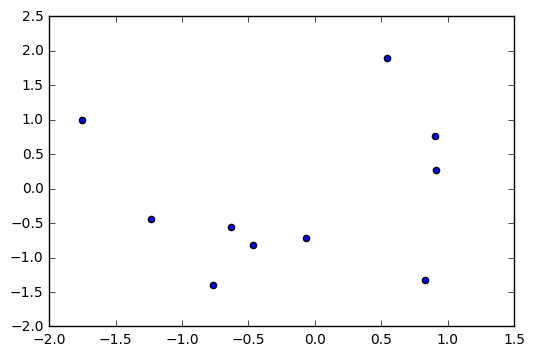

In [48]:
# если эта строчка вызывает ошибки - обновить ipython и matplotlib. или убрать ее
# или заменить на matplotlib inline.
%matplotlib inline

plt.scatter(points[:, 0], points[:, 1])
plt.show()

### Задача 1.1
Напишите функцию для генерации 3хмерных точек:

In [49]:
from sklearn.datasets import make_swiss_roll 

In [50]:
def generate_3d_points(N):
    return make_swiss_roll(n_samples=N, noise=0.1)[0]

In [51]:
make_swiss_roll(1000)[1].shape

(1000,)

In [52]:
from mpl_toolkits import mplot3d
def show_points(x):
    f = plt.figure()
    ax = mplot3d.Axes3D(f)
    ax.scatter(x[:, 0], x[:, 1], x[:, 2])

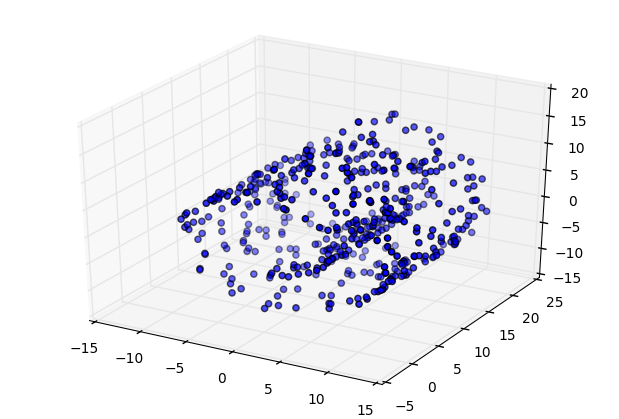

In [53]:
points3D = generate_3d_points(500)
show_points(points3D)

Теперь попробуем повернуть наше облако точек:

In [54]:
def rot_matrix(angles):
    cos = [np.math.cos(a) for a in angles]
    sin = [np.math.sin(a) for a in angles]
    Rz = np.array([[cos[2], -sin[2], 0],
                   [sin[2], cos[2],  0],
                   [     0,      0,  1]])

    Ry = np.array([[ cos[1], 0, sin[1]],
                   [      0, 1,      0],
                   [-sin[1], 0, cos[1]]])

    Rx = np.array([[1,      0,       0],
                   [0, cos[0], -sin[0]],
                   [0, sin[0], cos[0]]])
    #Rs = [Rx, Ry, Rz]
    return Ry.dot(Rx).dot(Rz)

R = rot_matrix([np.pi / 6.0, 0, np.pi / 3.0])
print 'R = ', R
print '||R||_2 = ', np.linalg.norm(R, ord=2)
print '|R| = ', np.linalg.det(R)


R =  [[ 0.5       -0.8660254  0.       ]
 [ 0.75       0.4330127 -0.5      ]
 [ 0.4330127  0.25       0.8660254]]
||R||_2 =  1.0
|R| =  1.0


### Задача 1.2(*)
Напишите функцию, вычисляющую углы поворота из матрицы поворота


In [55]:
import math

In [56]:
def rot_angles(matrix):
    sy = (R[0, 0]**2 + R[1, 0]**2)**(0.5)
    singular = sy < 1e-6

    if not singular:
        x = math.atan2(R[2, 1], R[2,2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1,1])
        y = math.atan2(-R[2, 0], sy)
        z = 0
    return np.vstack((x, y, z))

print rot_angles(R)

[[ 0.2810349 ]
 [-0.4478324 ]
 [ 0.98279372]]


### Задача 1.3. применение движений к точкам
* Примените операцию поворота к массиву points3D.
* Добавьте к повороту смещение на вектор t=[0,10,0]

In [57]:
# поворот вставьте сюда. отобразите результат
def rotate(points, rot_mat):
    #return np.array(map(lambda x: np.dot(rot_mat, x), points))
    return points.dot(rot_mat)
rotated_points = rotate(points3D, R)

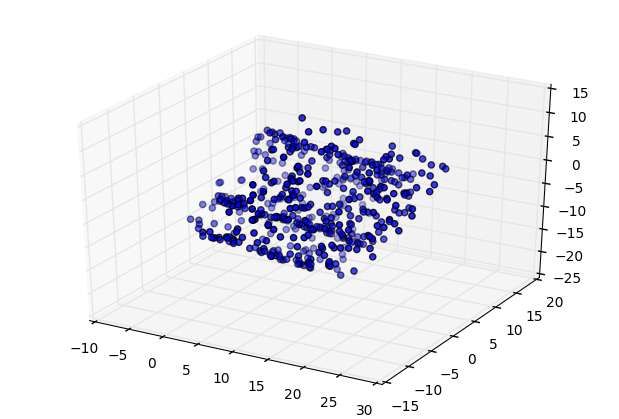

In [58]:
show_points(rotated_points)

In [59]:
t = np.array([0.0, 10.0, 0.0])
# сдвиг вставьте сюда. отобразите результат
def translate(points, t):
    return points + t

translated_points = translate(rotated_points, t)

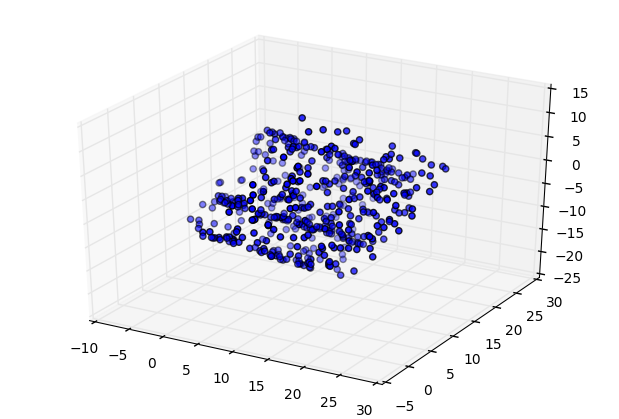

In [60]:
show_points(translated_points)

Теперь перейдем к однородным координатам.
Используйте функцию 'np.hstack', чтобы присоединить единичку к векторам-точкам.

In [61]:
def make_homogenous(points):
    return np.hstack([points, np.ones(points.shape[0])])
    
# вставьте движение точек с помощью однородных координат сюда. отобразите результат
def move(points, rot_mat, t):
    homogenous = make_homogenous(points)
    try:
        hrot_mat = np.hstack([rot_mat, t])
    except:
        assert rot_mat.shape[0] == t.shape[0]
    return np.dot(hrot_mat, points)

Мы научились обращаться с массивом точек, поворачивать, двигать его, переводить в однородные координаты. 
Если в обозначенных функциях вы пользовались циклами, постарайтесь обойтись без них.

## 2. Проективное преобразование
### Задача 2.4
* Сгенерируйте 4 двумерные точки в общем положении
* Сгенерируйте случайное проективное преобразовани
* Преобразуйте точки этим проективным преобразованием и отобразите на одном plot результаты до\после

In [62]:
# решение задачи 2.4
def generate_4points():
    return generate_3d_points(4).reshape(6, 2)[:4]

In [63]:
def plot_4points():
    pts = generate_4points()
    plt.figure(figsize=(10, 10))
    plt.scatter(pts[:, 0], pts[:, 1])

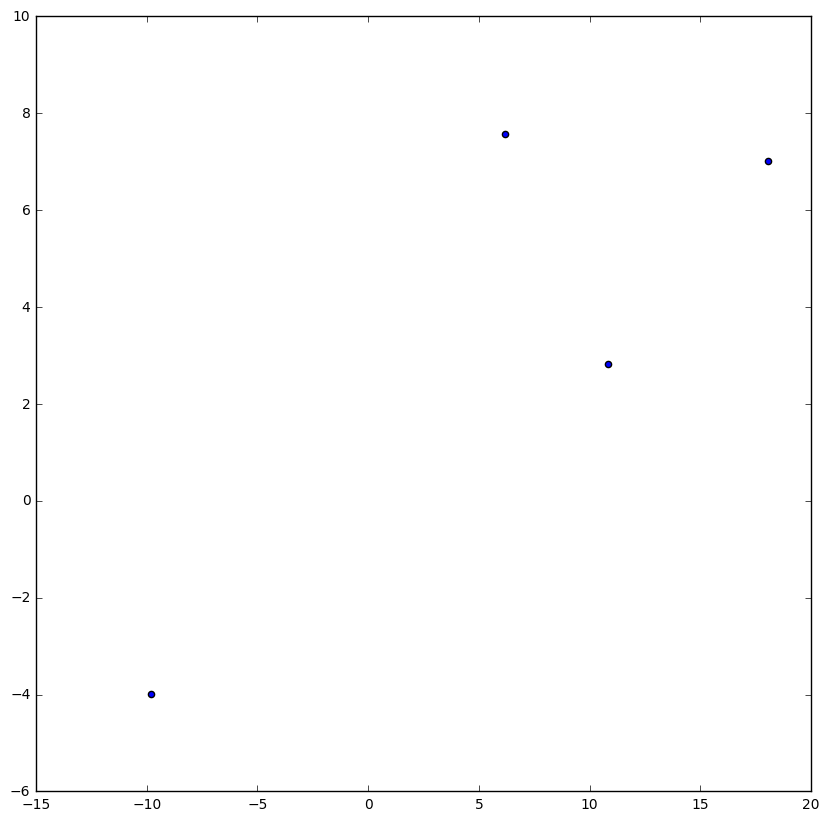

In [64]:
plot_4points()

### Задача 2.5(*)
Сгенерируйте 4 точки в общем положении. Вычислите проективное преобразование переводящее их в 
а) прямоугольник
б) квадрат

In [83]:
points

array([[-0.46820879, -0.82282485],
       [-0.0653801 , -0.71336192],
       [ 0.90635089,  0.76623673],
       [ 0.82605407, -1.32368279],
       [-1.75244452,  1.00244907],
       [ 0.54480945,  1.8951609 ],
       [-0.76935745, -1.40309592],
       [-0.63246751, -0.55887367],
       [-1.23323138, -0.43950352],
       [ 0.91478726,  0.26504093]])

In [84]:
x = points[0] 
y = points[1]
z = points[2]
v = points[3]

In [85]:
print x, y, z, v

[-0.46820879 -0.82282485] [-0.0653801  -0.71336192] [ 0.90635089  0.76623673] [ 0.82605407 -1.32368279]


In [86]:
xx, yy, zz, vv = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 0], [1,1,1]])

In [87]:
#решение задачи 2.5*
from numpy import cross

In [88]:
#выписываем преобразования

In [89]:
dst = np.array([x, y, z, v])

src = np.array([(0, 0), (0, 1), (1, 0), (1,1)])

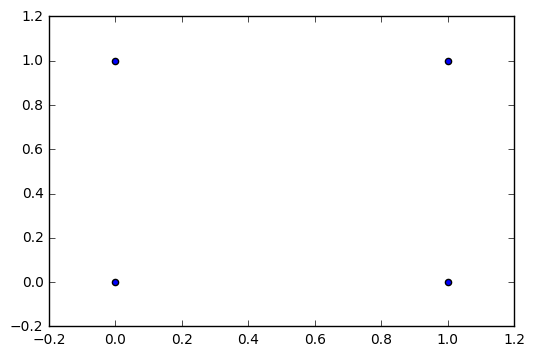

In [90]:
from skimage import transform as tf

square = tf.ProjectiveTransform()

square.estimate(src, dst)

warped = tf.warp(dst, square)

yy = square.inverse(dst)
plt.scatter(yy[:, 0], yy[:, 1])

In [245]:
from skimage.io import imread, imshow

In [246]:
%matplotlib inline

In [247]:
imag = imread('/home/grapefroot/Downloads/IMG_20160726_170834.jpg')

In [248]:
imag.shape

(1960, 2608, 3)

In [249]:
from skimage import data

In [250]:
x = np.array([816, 180])
z = np.array([2060, 208])
y = np.array([576, 1720])
v = np.array([2444, 1728])


dst = np.array([x, y, z, v])

src = np.array([(0, 0), (0, 1200), (1500, 0), (1500,1200)])

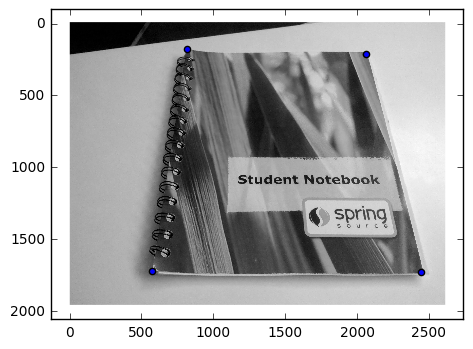

In [251]:
channel1 = imag[:, :, 0]
plt.gray()
plt.imshow(channel1)
plt.scatter(dst[:, 0], dst[:, 1])

In [252]:
from skimage import transform as tf

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(channel1, tform3, output_shape=(1200, 1500))

In [253]:
print channel1.shape, np.count_nonzero(channel1)

(1960, 2608) 5082073


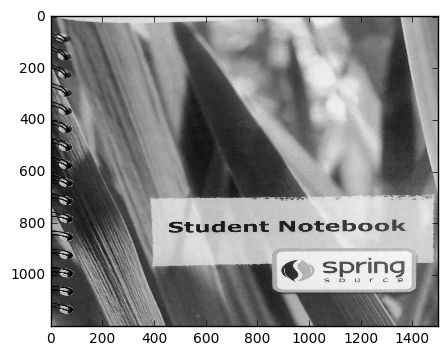

In [254]:
# yy = square.inverse(channel1)
plt.imshow(warped)

(-0.5, 299.5, 49.5, -0.5)

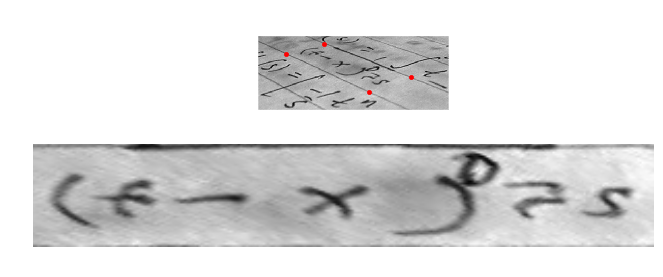

In [230]:
text = data.text()

src = np.array((
    (0, 0),
    (0, 50),
    (300, 50),
    (300, 0)
))
dst = np.array((
    (155, 15),
    (65, 40),
    (260, 130),
    (360, 95)
))

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 3))
#fig.subplots_adjust(**margins)
plt.gray()
ax1.imshow(text)
ax1.plot(dst[:, 0], dst[:, 1], '.r')
ax1.axis('off')
ax2.imshow(warped)
ax2.axis('off')

## 3. Центральная проекция. Матрица камеры
В этой части практической работы мы будем работать с камерой.
Наши трехмерные точки, сгенерированный в первой части мы будем проецировать на изображение камеры и отображать.

In [150]:
def check_rotationess(M):
    #rotation is a orthogonal mapping so R^T=R^-1
    identity = np.dot(M, M.T)
    I = np.identity(3, dtype=M.dtype)
    assert np.linalg.norm(I - identity) < 1e-6

def check_dimensions(R, t, K):
    assert t.shape[0] == 3 and R.shape == (3,3) and K.shape == (3,3)

In [151]:
from exceptions import ValueError

class Camera:
    '''Pinhole camera projection'''
    def __init__(self, R, t, K, size):
        check_rotationess(R)
        check_dimensions(R, t, K)
        # вставьте сюда проверку размеров и того что R - матрица поворота.
        self.R = R
        self.t = t
        self.K = K
        self.size = size
        # self.P = np.
        # self.P = K * (R|t)
        # self.size = size
        self.P = K.dot(np.hstack([R, t.reshape(t.shape[0], 1)]))
        pass
    
    def project(self, points):
        if points.shape[1] == 3:
            moved = translate(rotate(points, self.R), self.t)
            homo_pts = np.dot(moved, self.K.T)
        elif points.shape[1] == 4:
            homo_pts = self.P.dot(points.T)
        else:
            raise ValueError('Incorrect points size for Camera.project: %s' % \
                             str(points.shape))
        return homo_pts[:, : 2] / homo_pts[:, 2].reshape(-1, 1)

### Задача 3.6
Поместите камеру так, чтобы все точки были спереди камеры.
Спроецируйте точки и отобразите средствами matplotlib (используйте функцию plt.scatter).


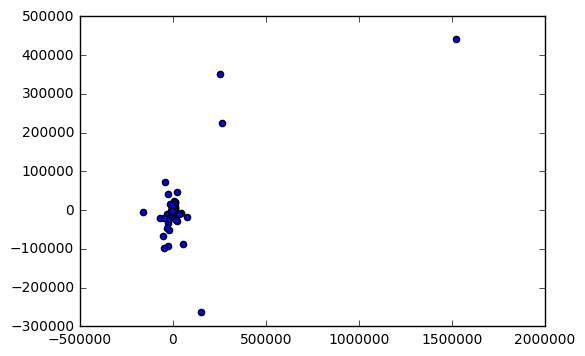

In [152]:
# решение задачи 3.6
K = np.array([[9.842439e+02, 0.000000e+00, 6.900000e+02],
              [0.000000e+00, 9.808141e+02, 2.331966e+02],
              [0.000000e+00, 0.000000e+00, 1.000000e+00]], dtype='float64')
R = np.eye(3, dtype='float64')
t = np.array([0, 0, 0], dtype='float64') # продобрать t используя статистики по Points
img_size = (600, 800)
cam = Camera(R=R, t=t, K=K, size=img_size)

# дебаг-проверка
# points3D = np.random.uniform(low=2,high=3,size=(10,3))

projected_pts = cam.project(points3D)
# plt.scatter ...
plt.scatter(projected_pts[:, 0], projected_pts[:, 1])

## 4. Работа с изображениями
Дискетные изображения - 3х-мерные массивы чисел.
Две координаты отвечают за пространственное положение пикселя, третья - за канал. 
Нумеровать измерения изображений могут по-разному, обычно это либо (ch, y, x), либо (y, x, ch). 
Один из наиболее частых типов изображения - 3х канальные восьмибитные.
В библиотеке OpenCV такой тип обозначается CV_8UC3.
Значения элементов такого изображения имеют тип uint8 (или unsigned char в C\C++) - по 256 градаций на каждый канал.


В Python есть различные библиотеки по работе с изображениями - PIL, OpenCV, Scikit-image, scipy.ndimage.
Все они представляют изображение в виде numpy.array

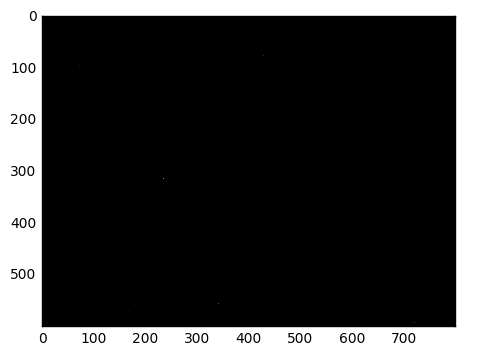

In [153]:
# попробуем создать пиксельное изображение с нашей камеры и отобразить точки на нем.
img = np.zeros(shape=(img_size[0], img_size[1], 3), dtype='uint8')

img_pts = projected_pts.astype('int') # переводим к целым координатам пикселей
# выделим только те точки, которые попадают в изображение
img_pts = img_pts[(img_pts[:, 0] >= 0) & (img_pts[:, 1] >= 0) & 
                  (img_pts[:, 0] < img_size[0]) & (img_pts[:, 1] < img_size[1])]

colors = np.random.uniform(0, 256, size=(img_pts.shape[0], 3)).astype('uint8')
img[img_pts[:, 0], img_pts[:, 1], :] = colors
plt.imshow(img) # вот так можно отобразить получившееся изображение
plt.show()


Итак, мы научились работать с растровыми изображениями.
Теперь попробуем применить наши знания к реальным данным.
В директории ../data/ вы можете найти изображение и облако точек, полученное с лидара - лазерного сканера, определяющее расстояния до точек в некотором телесном угле.
Изображение и точки взяты из общедоступного датасета KITTI (http://www.cvlibs.net/datasets/kitti/)

### Задача 4.6
Отобразить точки с лидара на изображении.

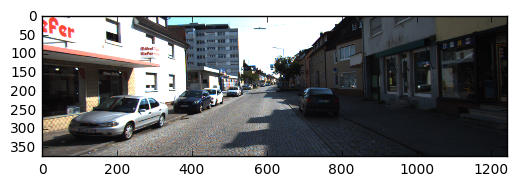

In [156]:
# взглянем на данные.
# изображение
from skimage import io
image = io.imread('../data/kitti_test_image.png')
plt.imshow(image)
plt.show()

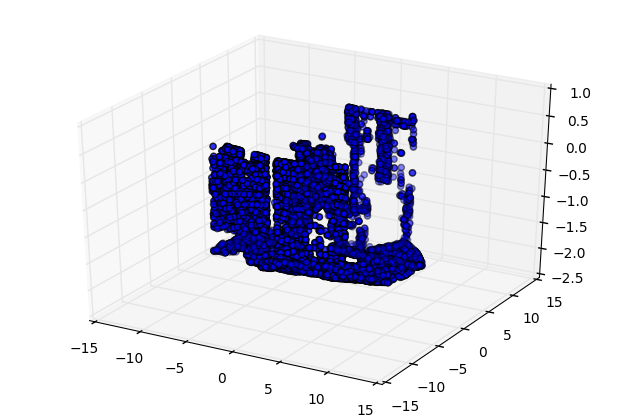

In [193]:
# точки с лидара
points = np.load('../data/points.npy')
f = plt.figure()
ax = mplot3d.Axes3D(f)
pts = points[np.random.randint(0, points.shape[0], 20000), :] # отобразим только часть точек, чтобы не было тормозов
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2])
plt.show()

Для успешного решения задачи необходимы параметры камеры и взаимной установки камеры и лидара.
Эта информация приводится в датасете KITTI.
Для простоты здесь будет все что нужно.

In [194]:
K = np.array([[9.597910e+02, 0.000000e+00, 6.960217e+02],
              [0.000000e+00, 9.569251e+02, 2.241806e+02],
              [0.000000e+00, 0.000000e+00, 1.000000e+00]], 
             dtype='float64')
# to_lidar transform,  вам нужно обратное.
R_to_lidar = np.array([[7.533745e-03, -9.999714e-01, -6.166020e-04],
                           [1.480249e-02,  7.280733e-04, -9.998902e-01],
                           [9.998621e-01,  7.523790e-03,  1.480755e-02]],
                          dtype='float64')
t_to_lidar = np.array([-4.069766e-03, -7.631618e-02, -2.717806e-01],
                          dtype='float64')

#камера расположена немного левее начала с.к.
R_cam = np.ones((3,3), dtype='float64')
t_cam = np.array([5.956621e-02, 2.900141e-04, 2.577209e-03],
                 dtype='float64')
img_size = image.shape

In [210]:
# отображение точек с лидара pts на изображение image.
R = np.linalg.inv(R_to_lidar)
t = t_cam - t_to_lidar

camera = Camera(R=R, t=t, K=K, size=img_size)
projected = cam.project(points=pts).astype('uint8')

/home/grapefroot/datascience2/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in divide


In [211]:
fitting = np.array(filter(lambda x: x[0] >= 0 and x[0] < image.shape[0] and x[1]>=0 and x[1] < image.shape[1], projected))

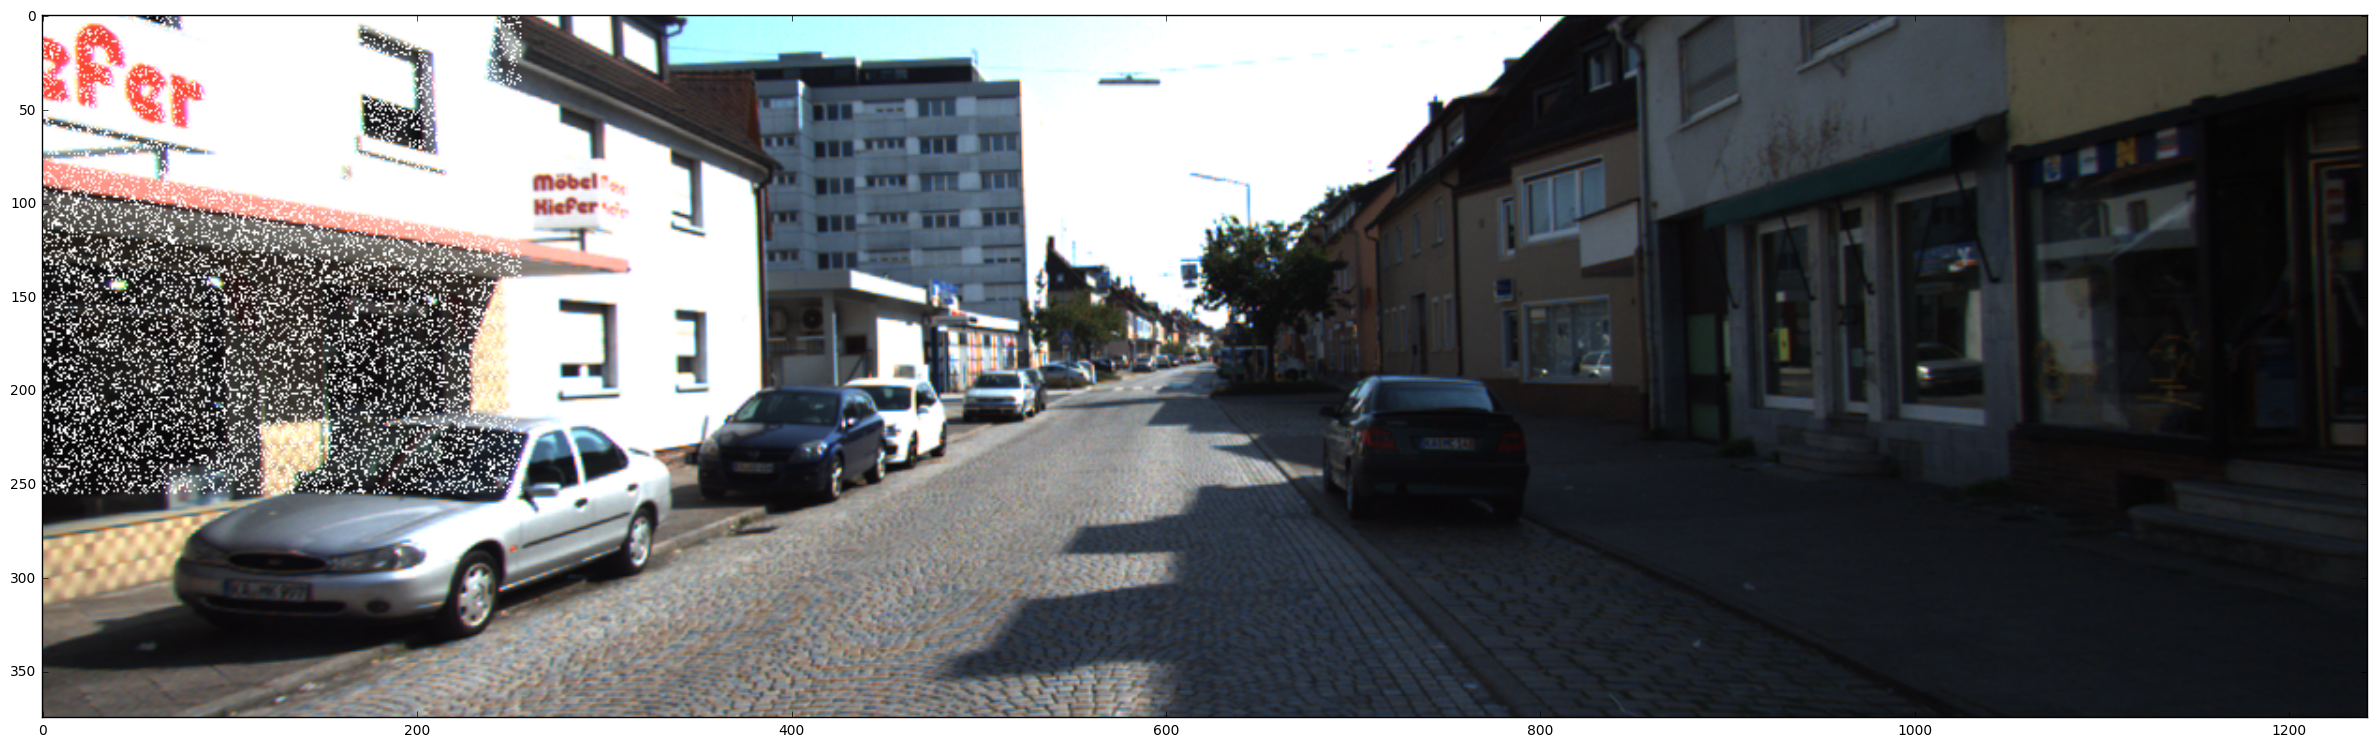

In [212]:
to_transform = image.copy()
to_transform[fitting[:, 0], fitting[:, 1], :] = 255
plt.figure(figsize=(30, 30))
plt.imshow(to_transform)
plt.show()

## Заключение
Поздравляю, вы завершили выполнение практической работы номер 1. - Геометрия и центральная проекция.
Надеюсь, вам было так же интересно выполнять задание как и мне его составлять.

Чтобы сдать задание можно
1) сделать fork репозитория
2) создать бранч с названием-вашей фамилией
3) закоммитить и сделать pull request.

или просто прислать выполненный .ipynb файл мне на емейл vicproon [at] gmail.
(лучше пулл реквест, так как я хочу посмотреть, как это будет работать для студенческих заданий).

Если вы нашли ошибку в коде или хотите что-то улучшить, можете так же сделать пулл реквест с понятным именем бранча.